# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

~~The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.~~

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

## 4.1 DQN

### Model Architecture + Init

#### Backgound

The following section instantiates an agent using the Deep Q-Learning Algorithm
as proposed by [Mnih 2015](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)
leveraging several pieces of code from Udacity's Deep Reinforement Learning Course.

#### Project Overview

The project architecture along with the DQN agent and following agents been abstracted to be used
with open AI gym models along with Udacity's ML-Agent models in order to provide a quick 
prototyping testbed for debugging.

#### DQN Description

The Neural Network used within the `DQNAgent` (and `DDQNAgent` below) utilizes three fully connected layers instantiated within the `QNetwork` classes. The input demensions are defined by the state size (37 for the Banana Environment), two hidden layers (defaulted to equal sizes of 64 nodes), and the output dimension equal to the action size (4 for the Banana Environment). The first and second layers are passed through a leaky RELU activation function and the final layer is direclty returned, since the response will be compared to the target network as described by Deep Q-Learning.

The DQN algorithm is largly contained within the `learn` method where Q-values are gathered from the target network, $Q^{hat}_{max}(s', \theta^-)$, given the next state, $s'$, the maximum action, $argmax(a')$, and target weights, $\theta^-$. These Q-values are then evaluated given the reward, $r$, discount rate, $\gamma$ such that $y = r + \gamma * Q^{hat}_{max}(s', a', \theta^-)$. The result is finally evaluated against the expected Q-Values, $Q(s, a, \theta)$, for the current state, $s$, action, $a$, and local weights, $theta$. The mean-squared error is evaluated from the difference of the values and backpropogation is conducted using an Adam optimizer. Soft updating is conducted with an interpolation parameter of, $\tau = 1.0e-3$.


#### Hyperparameters

```python
hyperparameters = DQNAgent(
    state_size: int = 37,
    action_size: int = 4,
    device: str = device,  #see below - dependant on resources/environment
    seed_state: int = 42,
    lr: float = 5e-4,
    update_every: int = 4,
    tau: float = 1e-3,
    gamma: float = 0.99,
    batch_size: int = 64,
    buffer_size=int(1e5),
)
```

#### Training

Below, the DQN agent is instantiated and trained below and model performance is then visualized.

In [1]:
diode = False # Set to true if in data diode
cloud = True  # set to true if in Cloud
gym_test = False

In [2]:
if not gym_test:
    if diode:
        import sys
        sys.path.insert('../ml-agents-0.4.0/python')
        from unityagents import UnityEnvironment
        from myagent.unity_environments import UnityEnvironmentMgr

    if cloud and not diode:
    #     !pip -q install ./python
        !pip install ./python
else:
    import gym

Processing ./python
    100% |████████████████████████████████| 48.1MB 760kB/s eta 0:00:01  6% |██▏                             | 3.2MB 30.6MB/s eta 0:00:02    12% |████                            | 6.1MB 28.7MB/s eta 0:00:02    15% |█████                           | 7.4MB 28.1MB/s eta 0:00:02    18% |█████▉                          | 8.8MB 28.7MB/s eta 0:00:02    27% |████████▋                       | 13.0MB 27.3MB/s eta 0:00:02    32% |██████████▌                     | 15.8MB 28.1MB/s eta 0:00:02    54% |█████████████████▋              | 26.4MB 27.7MB/s eta 0:00:01    68% |█████████████████████▉          | 32.8MB 26.6MB/s eta 0:00:01    75% |████████████████████████▎       | 36.4MB 24.2MB/s eta 0:00:01    85% |███████████████████████████▎    | 41.0MB 25.6MB/s eta 0:00:01    91% |█████████████████████████████▍  | 44.2MB 20.8MB/s eta 0:00:01    96% |███████████████████████████████ | 46.5MB 23.0MB/s eta 0:00:01
    100% |████████████████████████████████| 6.4MB 4.0MB/s eta 0:00:01   1% |

    100% |████████████████████████████████| 61kB 10.4MB/s ta 0:00:01
    100% |████████████████████████████████| 368kB 12.5MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 10.6MB/s ta 0:00:01   7% |██▌                             | 174kB 21.6MB/s eta 0:00:01    56% |██████████████████              | 1.2MB 20.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for unityagents ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-060xrz7z/wheels/97/7a/24/09937717b9737178ae827bcef33ba219b540efd55be210010c
  Running setup.py bdist_wheel for docopt ... done
  Stored in directory: /root/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /root/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built unityagents docopt termcolor
tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipytho

In [3]:
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

# LOCAL IMPORT
from myagent.agents import Agent, DQNAgent, ReplayBuffer
from myagent.environments import EnvironmentMgr, GymEnvironmentMgr
from myagent.trainers import Trainer, DQNTrainer
from myagent.qnetworks import QNetwork


%matplotlib inline

In [4]:
# CITATION: From Udacity's Deep Learning course, CycleGAN exercise
# ACM: I don't think I need convolutional layers since I am only 
#      ingesting state data - not pixels
def my_conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                           kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
    
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)
    
# helper deconv function
def my_deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transpose convolutional layer, with optional batch normalization.
    """
    layers = []
    # append transpose conv layer
    layers.append(nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False))
    # optional batch norm layer
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

### Instantiate

In [5]:
ran_once = False
if gym_test:
    envh = GymEnvironmentMgr('LunarLander-v2')
elif not ran_once:
    if diode:
        file = "/../Banana_Linux_NoVis/Banana.x86_64"
    elif cloud:
        file = "/data/Banana_Linux_NoVis/Banana.x86_64"
    else:
        file = 'data/Banana_Windows_x86_64/Banana.exe'
    from myagent.unity_environments import UnityEnvironmentMgr
    envh = UnityEnvironmentMgr(file)
    ran_once = True
    

In [6]:
envh.start()
state_size = envh.state_size
action_size = envh.action_size

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agent = DQNAgent(state_size=state_size, action_size=action_size, seed_state=42, device=device)
trainer = DQNTrainer(agent, envh, solved=13.0, max_t=20000)
# trainer = DQNTrainer(agent, env)

### Run

In [8]:
scores = trainer.train()

Episode 100	Average Score: 1.29
Episode 200	Average Score: 4.62
Episode 300	Average Score: 7.93
Episode 400	Average Score: 10.69
Episode 472	Average Score: 13.03
Environment solved in 472 episodes!	Average Score: 13.03


The DQN Agent solved the environment in 472 episodes with an average
score of 13.03

In [9]:
# envh.env.close()

In [10]:
import datetime
agent = trainer.agent
now = datetime.datetime.now()
save_f = f'checkpoint-banana-dqn-{now.strftime("%Y%m%dT%H%M%S")}.pth'
agent.save(save_f)

### Visualize

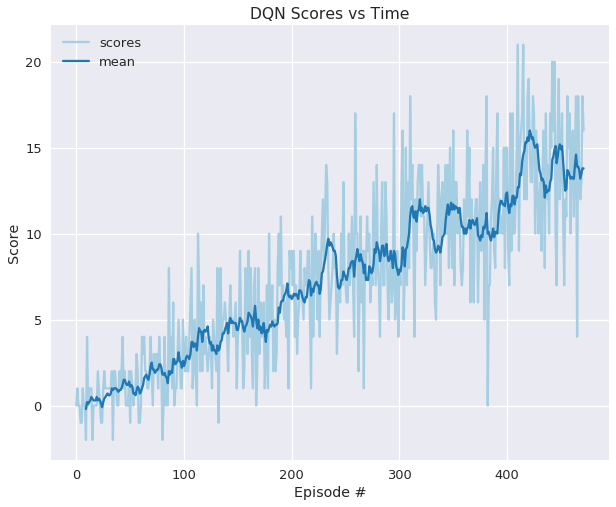

In [11]:
import pandas as pd
import seaborn as sns
try:
    # Rotate Chorma
    i_map += 1
except NameError:
    sns.set_style('darkgrid')
    sns.set_context('talk')
    sns.set_palette('Paired')
    cmap = sns.color_palette('Paired')
    i_map = 0

fig ,ax = plt.subplots(1,1, figsize=(10,8))
score_df = pd.DataFrame({'scores': scores})
score_df = score_df.assign(mean=lambda df: df.rolling(10).mean()['scores'])
ax = score_df.plot(ax=ax, color=cmap[2*(i_map%3):])
ax.set_title('DQN Scores vs Time')
ax.set_xlabel('Episode #')
ax.set_ylabel('Score')
plt.show()

The DQN agent solve the environment well within the required 1800 episodes

In [12]:
save_f = f'agent-banana-dqn-{now.strftime("%Y%m%dT%H%M%S")}.png'
fig.savefig(save_f)

## 4.2 DDQN

The following section instantiates an agent using the Double Deep Q-Learning Algorithm
as proposed by [Z Wang 2016](https://arxiv.org/pdf/1511.06581.pdf). The agent shares
similar structure the the DQN agent above except for the `learn` method.

In DDQN, when evaluating Q-tables, the max(action), $a_{max}'$ for the next state, $s'$,
is evaluated from the local Q-network, $Q(\theta)$. Then, $a_{max}'$ is used with $s'$ to evalutate
the expected Q-values from the target Q-network, $Q(\theta')$.

*Z Wang, et al. Dueling Network Architectures for Deep Reinforcement Learning. arXiv, 5 Apr 2016, 1511.06581v3 ( https://arxiv.org/pdf/1511.06581.pdf ).*

In [13]:
diode = False # Set to true if in data diode
cloud = True  # set to true if in Cloud
gym_test = False

In [14]:
if not gym_test:
    if diode:
        import sys
        sys.path.insert('../ml-agents-0.4.0/python')
        from unityagents import UnityEnvironment
        from myagent.unity_environments import UnityEnvironmentMgr

    if cloud and not diode:
    #     !pip -q install ./python
        !pip install ./python
else:
    import gym

Processing ./python


  Running setup.py bdist_wheel for unityagents ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-9lzdp3nu/wheels/97/7a/24/09937717b9737178ae827bcef33ba219b540efd55be210010c
Successfully built unityagents
  Found existing installation: unityagents 0.4.0
    Uninstalling unityagents-0.4.0:
      Successfully uninstalled unityagents-0.4.0


In [15]:
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

# LOCAL IMPORT
from myagent.agents import DDQNAgent
from myagent.trainers import DQNTrainer

%matplotlib inline

### Instantiate

In [16]:
# Prevent running from previous sections
try:
    ran_once
except NameError:
    ran_once = False
    
# Load Environment
if gym_test:
    from myagent.environments import GymEnvironmentMgr
    envh = GymEnvironmentMgr('LunarLander-v2')
elif not ran_once:
    if diode:
        file = "/../Banana_Linux_NoVis/Banana.x86_64"
    elif cloud:
        file = "/data/Banana_Linux_NoVis/Banana.x86_64"
    else:
        file = 'data/Banana_Windows_x86_64/Banana.exe'
    from myagent.unity_environments import UnityEnvironmentMgr
    envh = UnityEnvironmentMgr(file)
    ran_once = True
    

In [17]:
envh.start()
state_size = envh.state_size
action_size = envh.action_size
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
ddqn_agent = DDQNAgent(state_size=state_size, action_size=action_size, seed_state=42, device=device)
ddqn_trainer = DQNTrainer(ddqn_agent, envh, solved=13.0, max_t=20000)
# trainer = DQNTrainer(agent, env)

### Run

In [19]:
ddqn_scores = ddqn_trainer.train()

Episode 100	Average Score: 0.73
Episode 200	Average Score: 4.38
Episode 300	Average Score: 8.03
Episode 400	Average Score: 11.52
Episode 430	Average Score: 13.08
Environment solved in 430 episodes!	Average Score: 13.08


The DDQN Agent solved the environment in 430 episodes with an average score of 13.08 

In [12]:
# envh.env.close()

In [21]:
import datetime

In [22]:
now = datetime.datetime.now()
save_f = f'checkpoint-banana-ddqn-{now.strftime("%Y%m%dT%H%M%S")}.pth'

ddqn_trainer.agent.save(save_f)

### Visualize

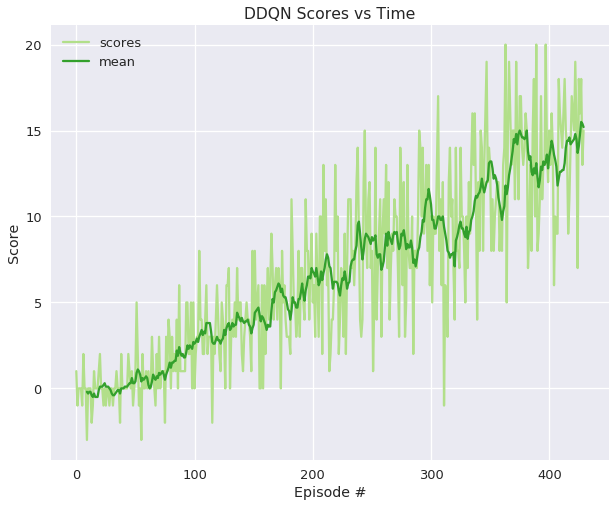

In [23]:
import pandas as pd
import seaborn as sns
try:
    # Rotate Chorma
    i_map += 1
except NameError:
    sns.set_style('darkgrid')
    sns.set_context('talk')
    sns.set_palette('Paired')
    cmap = sns.color_palette('Paired')
    i_map = 0

fig ,ax = plt.subplots(1,1, figsize=(10,8))
ddqn_score_df = (
    pd.DataFrame({'scores': ddqn_scores})
    .assign(mean=lambda df: df.rolling(10).mean()['scores'])
)
ax = ddqn_score_df.plot(ax=ax, color=cmap[2*(i_map%3):])
ax.set_title('DDQN Scores vs Time')
ax.set_xlabel('Episode #')
ax.set_ylabel('Score')
plt.show()

In [24]:
save_f = f'agent-banana-ddqn-{now.strftime("%Y%m%dT%H%M%S")}.png'
fig.savefig(save_f)

The DDQN agent converges slightly quicker than the DQN agent above by ~ 40 episodes

## 4.3 Load Previous Agents

In [1]:
diode = False # Set to true if in data diode
cloud = True  # set to true if in Cloud
gym_test = False

In [2]:
if not gym_test:
    if diode:
        import sys
        sys.path.insert('../ml-agents-0.4.0/python')
        from unityagents import UnityEnvironment
        from myagent.unity_environments import UnityEnvironmentMgr

    if cloud and not diode:
    #     !pip -q install ./python
        !pip install ./python
else:
    import gym

Processing ./python
    100% |████████████████████████████████| 48.1MB 398kB/s eta 0:00:01  1% |▍                               | 501kB 14.6MB/s eta 0:00:04    2% |▊                               | 1.0MB 9.5MB/s eta 0:00:05    3% |█                               | 1.6MB 25.3MB/s eta 0:00:02    5% |█▉                              | 2.8MB 15.4MB/s eta 0:00:03    15% |█████                           | 7.6MB 24.5MB/s eta 0:00:02    18% |█████▉                          | 8.8MB 13.6MB/s eta 0:00:03    19% |██████▎                         | 9.4MB 14.1MB/s eta 0:00:03    21% |███████                         | 10.4MB 6.8MB/s eta 0:00:06    22% |███████▏                        | 10.7MB 6.5MB/s eta 0:00:06    24% |████████                        | 12.0MB 7.7MB/s eta 0:00:05    27% |████████▊                       | 13.1MB 8.6MB/s eta 0:00:05    28% |█████████▏                      | 13.7MB 12.5MB/s eta 0:00:03    29% |█████████▌                      | 14.3MB 27.2MB/s eta 0:00:02    32% |█████████

    100% |████████████████████████████████| 133kB 8.6MB/s ta 0:00:01  15% |█████                           | 20kB 11.8MB/s eta 0:00:01
    100% |████████████████████████████████| 122kB 3.9MB/s ta 0:00:01  17% |█████▌                          | 20kB 11.0MB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 3.3MB/s ta 0:00:011    75% |████████████████████████▎       | 1.7MB 23.3MB/s eta 0:00:01
    100% |████████████████████████████████| 368kB 5.3MB/s ta 0:00:011  16% |█████▍                          | 61kB 3.7MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 2.8MB/s ta 0:00:01    37% |████████████                    | 20kB 8.9MB/s eta 0:00:01


  Running setup.py bdist_wheel for unityagents ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-1opfpjk8/wheels/97/7a/24/09937717b9737178ae827bcef33ba219b540efd55be210010c
  Running setup.py bdist_wheel for docopt ... done
  Stored in directory: /root/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /root/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built unityagents docopt termcolor
tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.
  Found existing installation: protobuf 3.5.1
    Uninstalling protobuf-3.5.1:
      Successfully uninstalled protobuf-3.5.1
  Found existing installation: tensorflow 1.3.0
    Uninstalling tensorflow-1.3.0:
      Successfully un

In [3]:
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

# LOCAL IMPORT
from myagent.agents import DDQNAgent, DQNAgent
from myagent.trainers import DQNTrainer

%matplotlib inline

### Instantiate

In [4]:
# Prevent running from previous sections
try:
    ran_once
except NameError:
    ran_once = False
    
# Load Environment
if gym_test:
    from myagent.environments import GymEnvironmentMgr
    envh = GymEnvironmentMgr('LunarLander-v2')
elif not ran_once:
    if diode:
        file = "/../Banana_Linux_NoVis/Banana.x86_64"
    elif cloud:
        file = "/data/Banana_Linux_NoVis/Banana.x86_64"
    else:
        file = 'data/Banana_Windows_x86_64/Banana.exe'
    from myagent.unity_environments import UnityEnvironmentMgr
    envh = UnityEnvironmentMgr(file)
    ran_once = True
    

In [5]:
envh.start()
state_size = envh.state_size
action_size = envh.action_size
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
dqn_agent = DQNAgent(state_size=state_size, action_size=action_size, seed_state=42, device=device)
dqn_agent.load('checkpoint-banana-dqn-20210807T001500.pth')
dqn_trainer = DQNTrainer(dqn_agent, envh, solved=13.0, max_t=200, n_episodes=3)

ddqn_agent = DDQNAgent(state_size=state_size, action_size=action_size, seed_state=42, device=device)
ddqn_agent.load('checkpoint-banana-ddqn-20210807T002034.pth')
ddqn_trainer = DQNTrainer(ddqn_agent, envh, solved=13.0, max_t=200, n_episodes=3)
# trainer = DQNTrainer(agent, env)

In [21]:
dqn_scores = ddqn_trainer.eval(n_episodes=100)

Episode 100	Final Score21.0

In [22]:
print(f'Mean Scores: {np.mean(dqn_scores):.2f}')

Mean Scores: 13.13


In [23]:
ddqn_scores = ddqn_trainer.eval(n_episodes=100)

Episode 100	Final Score14.0

In [24]:
print(f'Mean Scores: {np.mean(ddqn_scores):.2f}')

Mean Scores: 13.28


In [25]:
# envh.env.close()

The Loaded Agents, DQN and DDQN agents, average to the graded scores they have been trained to (~13) and can sucessfully navigate the Banana environment.

## Future Work

More advanced algorithms such as Dueling Q-networks or prioritized experience replay could be implemented to potentially improve performance. Though, more interestingly deriving a DQN network direct from pixel data instead of processed state data. Such an implementation will require a significantly more advanced neural network to implement within the q-network. As described in Mnih 2015 an attrative approach would be to implement a convolutional neural network inserted before a fully connected layer to extract important feature data. Behind a convolutional network a similiar fully-connected layer and DQN algorithm would be sufficient to achieve increased capability.